# La Programmation Orientée Object
Une classe en Python, c'est juste

In [1]:
class Point:
    x, y, z = (0,0,0)

On peut inspecter les données de la classe ou de l'instance

In [2]:
p=Point()

In [3]:
vars(Point)

mappingproxy({'__module__': '__main__',
              'x': 0,
              'y': 0,
              'z': 0,
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': None})

In [4]:
vars(p)

{}

Et les modifier dynamiquement

In [5]:
Point.couleur = "black"

In [6]:
vars(Point)

mappingproxy({'__module__': '__main__',
              'x': 0,
              'y': 0,
              'z': 0,
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': None,
              'couleur': 'black'})

In [7]:
p.couleur

'black'

In [8]:
p.x = 1

In [9]:
p.color = "Red"

In [10]:
vars(Point)

mappingproxy({'__module__': '__main__',
              'x': 0,
              'y': 0,
              'z': 0,
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': None,
              'couleur': 'black'})

In [11]:
vars(p)

{'x': 1, 'color': 'Red'}

In [12]:
class Point:
    x, y, z = (0,0,0)
q=Point()

 `p` et `q` sont des instances `Point` mais de classes différentes

In [13]:
vars(p.__class__) # avec couleur

mappingproxy({'__module__': '__main__',
              'x': 0,
              'y': 0,
              'z': 0,
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': None,
              'couleur': 'black'})

In [14]:
vars(q.__class__) # sans couleur

mappingproxy({'__module__': '__main__',
              'x': 0,
              'y': 0,
              'z': 0,
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': None})

/!\ Attention à l'écrasement d'une précédente déclaration

In [15]:
class Point:
    x, y, z = (0,0,0)
    def norm2(self): # méthode d'instance (avec self)
        import math
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    def unitrand():   # méthode de classe (aka statique) (sans self)
        import random as rnd
        p = Point()
        p.x = rnd.random()
        p.y = rnd.random()
        p.z = rnd.random()
        n2 = p.norm2()
        p.x /= n2
        p.y /= n2
        p.z /= n2
        return p

In [16]:
p = Point.unitrand()

In [17]:
p.norm2() # équivalent à

0.9999999999999999

In [18]:
Point.norm2(p)

0.9999999999999999

Tout comme avec les attributs on peut modifier les méthodes tant sur la classe que sur l'objet a posteriori

In [19]:
def norand():
    return Point()
oldrand = Point.unitrand 
Point.unitrand = norand 
q = Point.unitrand()
q.norm2()

0.0

En Python, il n'y a pas de restriction conceptuelle dans l'encapsulation
[_"we're all consenting adults here"_](http://preserve.mactech.com/articles/mactech/Vol.20/20.11/PythonForAppleScripters/index.html)

La convention est d'utiliser un préfixe __ pour indiquer qu'une méthode ou donnée est _privée_ (mais sans aucune restriction dans l'usage).

D'après https://docs.python.org/3/reference/lexical_analysis.html#reserved-classes-of-identifiers nous avons:
* _ * : Not imported by from module import *. 

  The special identifier _ is used in the interactive interpreter to store the result of the last evaluation.

* __ * __ : System-defined names, informally known as “dunder” names. These names are defined by the interpreter and its implementation.
  
  Dont la liste est ici: https://docs.python.org/3/reference/datamodel.html#specialnames

* __* : Class-private names.
 
  Avec un renommage interne pour éviter les collisions avec les classes dérivées.

In [20]:
p.__class__

__main__.Point

In [21]:
Point.__dict__ # en essayer d'autres avec la complétion assistée

mappingproxy({'__module__': '__main__',
              'x': 0,
              'y': 0,
              'z': 0,
              'norm2': <function __main__.Point.norm2(self)>,
              'unitrand': <function __main__.norand()>,
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': None})

In [22]:
class Point:
    # pas besoin de déclarer les attributs
    def __init__(self): # c'est le constructeur
        self.x, self.y, self.z = 0, 0, 0 # on les construit quand on veut
    def __repr__(self): # c'est l'affichage de debug (et dans le REPL)
        return f"Point({self.x},{self.y},{self.z})"
    def __str__(self): # c'est la représentation en chaine de caractères (cf print ou format)
        return f"({self.x},{self.y},{self.z})"
    def norm2(self): # méthode d'instance (avec self)
        import math
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    unitrand = oldrand

In [23]:
class GrayScaleColor:
    """La documentation in-situ de la classe"""

    def __init__(self):
        self._color=0
    def _set_color(self, c):
        # self._couleur = min(1, max(0, c)) # ça serait un bug silencieux 
        self._color = min(1, max(0, c))
    def _get_color(self):
        return self._color
    def __repr__(self):
        if (self._color == 1):
            return "White"
        if (self._color == 0):
            return "Black"
        return "Gray"
    # une property pour contrôler les accès à `color`
    color = property(_get_color, _set_color)

In [24]:
help(GrayScaleColor)
c=GrayScaleColor()
c.color = 2
c.color # 1

Help on class GrayScaleColor in module __main__:

class GrayScaleColor(builtins.object)
 |  La documentation in-situ de la classe
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  color



1

Les méthodes spéciales utiles à connaître sont ainsi:

In [25]:
# Utilitaire permettant de définir une classe par ajout successif (utile pour la démo)
import functools
def update_class(
    main_class=None, exclude=("__module__", "__name__", "__dict__", "__weakref__")
):
    """Class decorator. Adds all methods and members from the wrapped class to main_class

    Args:
    - main_class: class to which to append members. Defaults to the class with the same name as the wrapped class
    - exclude: black-list of members which should not be copied
    """

    def decorates(main_class, exclude, appended_class):
        if main_class is None:
            main_class = globals()[appended_class.__name__]
        for k, v in appended_class.__dict__.items():
            if k not in exclude:
                setattr(main_class, k, v)
        return main_class

    return functools.partial(decorates, main_class, exclude)

* `__init__` : pour initialiser un objet

In [26]:
class Book():
    def __init__(self, name, writer, pages):
       self.name = name
       self.writer = writer
       self.pages = pages

In [27]:
b = Book("Moby Dick", "Herman Melville", "378")
type(b)

__main__.Book

* `__repr__` : pour obtenir une version *représentable*

In [28]:
print(b)

In [29]:
@update_class()
class Book():
    def __repr__(self):
       return f"Book id={id(self)}"

In [30]:
print(b)

Book id=4383936176


* `__str__` : pour une conversion en chaîne de caractères

In [31]:
print(b)

Book id=4383936176


In [32]:
@update_class()
class Book():
    def __str__(self):
       return f"The title of the book is {self.name}"

In [33]:
print(b) # __str__ prend le pas sur __repr__ si défini

The title of the book is Moby Dick


In [34]:
repr(b) # mais __repr__ est encore et toujours là avec une implémentation par défaut

'Book id=4383936176'

In [35]:
del Book.__repr__

In [36]:
repr(b)

'<__main__.Book object at 0x1054d8eb0>'

* `__len__` : pour interagir avec <tt>len</tt>

In [37]:
@update_class()
class Book():
    def __len__(self):
        return int(self.pages)

In [38]:
len(b)

378

* `__eq__` : pour définir l'égalité entre objets

In [39]:
b2 = Book("Moby Dick", "Herman Melville", "378")

In [40]:
b == b2 # ce sont des objets distincts

False

In [41]:
@update_class()
class Book():
    def __eq__(self, other):
        return (self.name == other.name) & (self.writer == other.writer)

In [42]:
b == b2

True

Il en existe bien plus:
* [Liste officielle et exhaustive](https://docs.python.org/3/reference/datamodel.html) (mais peu digeste)
* [Liste plus sympa](https://www.pythonlikeyoumeanit.com/Module4_OOP/Special_Methods.html)

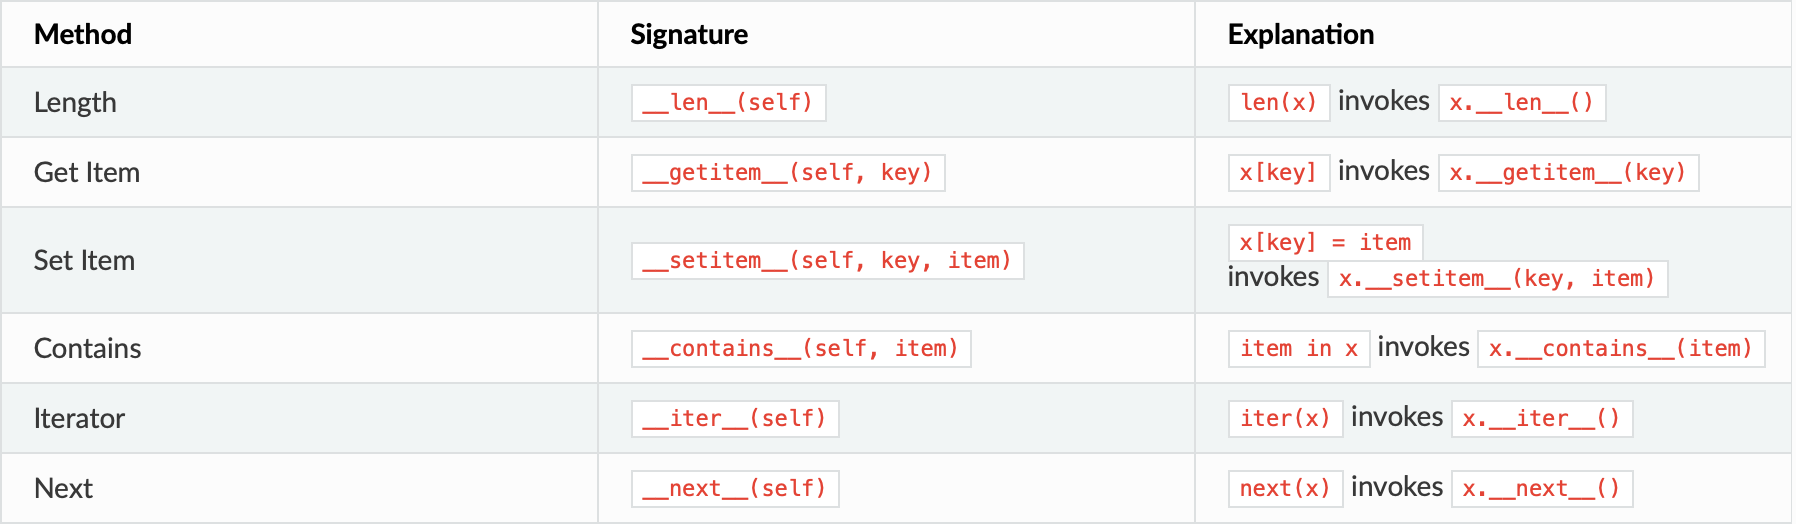

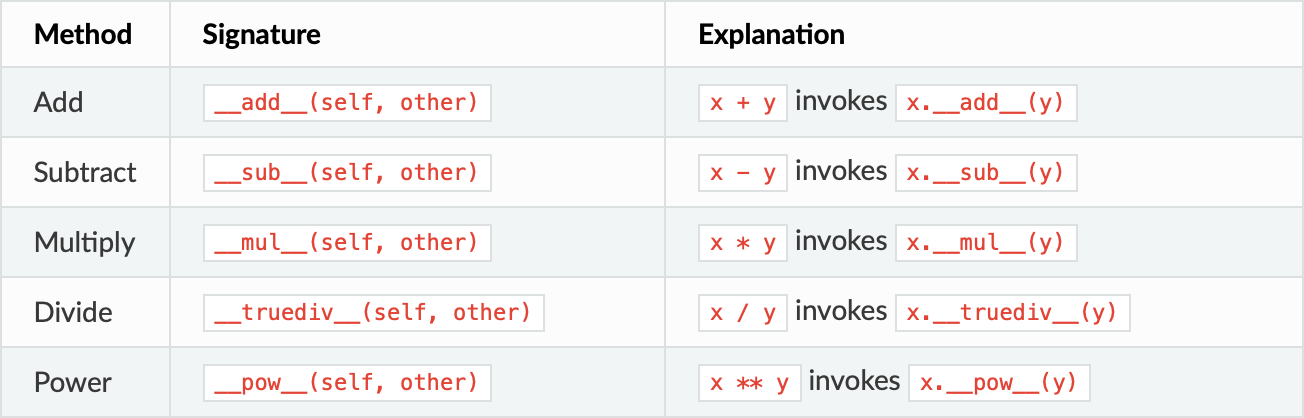

## L'héritage

In [43]:
class Point:
    def __init__(self, *v):
        self.x, self.y = v
    def __repr__(self):
        return f"Point({self.x},{self.y})"
p = Point(1,2)

In [44]:
class Pixel(Point):
    def __init__(self, x, y, c):
        super().__init__(x,y) # call base initializer
        self.color = c

## La résolution de scope
/!\ La résolution d'attribut ne passe pas par le code de la classe (c'est la règle [LEGB](https://realpython.com/python-scope-legb-rule/))
* **L**ocal Scope
* **E**nclosing Scope (par exemple pour des fonctions incluses dans des fonctions)
* **G**lobal Scope
* **B**uilt-In Scope

In [45]:
a = 1
class C:
    a = 2
    def f(self):
        print(a)
        print(C.a)

ins = C()
ins.f() # affiche 1 puis 2

1
2
